In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, validation_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import joblib

In [2]:
model = joblib.load('medical_device_model.pkl')

In [3]:
with open('X_train.pkl', 'rb') as file:
    X_train = pickle.load(file)

In [4]:
with open('y_train.pkl', 'rb') as file:
    y_train = pickle.load(file)

In [5]:
with open('X_test.pkl', 'rb') as file:
    X_test = pickle.load(file)

In [6]:
with open('y_test.pkl', 'rb') as file:
    y_test = pickle.load(file)

In [7]:
df = pd.read_csv('Wrangled.csv')

C:\Users\veron\AppData\Local\Temp\ipykernel_28396\2296681516.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Wrangled.csv')


In [8]:
tot_rfrg_prvdrs_max = df['Tot_Rfrg_Prvdrs'].max()
df.loc[df['Tot_Rfrg_Prvdrs'] == tot_rfrg_prvdrs_max]

,Unnamed: 0,Rfrg_Prvdr_Geo_Lvl,Rfrg_Prvdr_Geo_Cd,Rfrg_Prvdr_Geo_Desc,BETOS_Lvl,BETOS_Cd,BETOS_Desc,HCPCS_Cd,HCPCS_Desc,Suplr_Rentl_Ind,Tot_Rfrg_Prvdrs,Tot_Suplrs,Tot_Suplr_Benes,Tot_Suplr_Clms,Tot_Suplr_Srvcs,Avg_Suplr_Sbmtd_Chrg,Avg_Suplr_Mdcr_Alowd_Amt,Avg_Suplr_Mdcr_Pymt_Amt,Avg_Suplr_Mdcr_Stdzd_Amt
592,592,National,6.0,National,Durable Medical Equipment,D1E,Other DME,A4253,Blood glucose test or reagent strips for home ...,N,233762,43511,1891407.0,5104070,13931820,61.932717,8.400779,5.964003,5.786099


In [9]:
blood_glucose_test = df[df.HCPCS_Cd == 'A4253']
blood_glucose_test.T

,592,1999,2624,3186,3987,4884,5882,6642,7284,7821,...,38072,38787,39428,39723,39856,40037,40109,40154,40206,40228
Unnamed: 0,592,1999,2624,3186,3987,4884,5882,6642,7284,7821,...,38072,38787,39428,39723,39856,40037,40109,40154,40206,40228
Rfrg_Prvdr_Geo_Lvl,National,State,State,State,State,State,State,State,State,State,...,State,State,State,State,State,State,State,State,State,State
Rfrg_Prvdr_Geo_Cd,6.0,1.0,2.0,4.0,5.0,6.0,8.0,9.0,10.0,11.0,...,54,55,56,66,72,78,9B,9C,9D,9E
Rfrg_Prvdr_Geo_Desc,National,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,West Virginia,Wisconsin,Wyoming,Guam,Puerto Rico,Virgin Islands,Armed Forces Europe,Armed Forces Pacific,Unknown,Foreign Country
BETOS_Lvl,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,...,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment,Durable Medical Equipment
BETOS_Cd,D1E,D1E,D1E,D1E,D1E,D1E,D1E,D1E,D1E,D1E,...,D1E,D1E,D1E,D1E,D1E,D1E,D1E,D1E,D1E,D1E
BETOS_Desc,Other DME,Other DME,Other DME,Other DME,Other DME,Other DME,Other DME,Other DME,Other DME,Other DME,...,Other DME,Other DME,Other DME,Other DME,Other DME,Other DME,Other DME,Other DME,Other DME,Other DME
HCPCS_Cd,A4253,A4253,A4253,A4253,A4253,A4253,A4253,A4253,A4253,A4253,...,A4253,A4253,A4253,A4253,A4253,A4253,A4253,A4253,A4253,A4253
HCPCS_Desc,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...,Blood glucose test or reagent strips for home ...
Suplr_Rentl_Ind,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,N,N,N


In [10]:
dummy_df = pd.get_dummies(blood_glucose_test)

In [11]:
X = dummy_df.drop(columns='Avg_Suplr_Sbmtd_Chrg')
y = dummy_df['Avg_Suplr_Sbmtd_Chrg']

In [12]:
len(X), len(y)

(59, 59)

In [13]:
model.fit(X, y)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=12, random_state=47))])

In [14]:
cv_results = cross_validate(model, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [15]:
cv_results['test_score']

array([-3.78284108, -3.89761003, -4.09158728, -2.96631484, -4.10026264])

In [16]:
mae_mean, mae_std = np.mean(-1 * cv_results['test_score']), np.std(-1 * cv_results['test_score'])
mae_mean, mae_std

(3.767723173549875, 0.41828815748012405)

In [17]:
#Linear Regression

LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
y_pred_lr = LR_model.predict(X_test)
mean_mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error:", mean_mse_lr)

Mean Squared Error: 6592.223936490918


In [18]:
rmse_lr = np.sqrt(mean_mse_lr)
print("Root Mean Square Error (RMSE):", rmse_lr)

Root Mean Square Error (RMSE): 81.19251157890682


In [19]:
#Support Vector Regression (SVR)

from sklearn.svm import SVR

svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mean_mse_svr = mean_squared_error(y_test, y_pred_svr)
print("Mean Squared Error:", mean_mse_svr)

Mean Squared Error: 328551301.91148347


In [20]:
rmse_svr = np.sqrt(mean_mse_svr)
print("Root Mean Square Error (RMSE):", rmse_svr)

Root Mean Square Error (RMSE): 18125.9841639422


In [21]:
#Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

param_grid_gbr = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}
grid_search_gbr = GridSearchCV(GradientBoostingRegressor(random_state=47), param_grid_gbr, cv=5, scoring='neg_mean_squared_error')
grid_search_gbr.fit(X_train, y_train)
best_params_gbr = grid_search_gbr.best_params_
print(best_params_gbr)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}


In [22]:
gbr_model = GradientBoostingRegressor(n_estimators=150, learning_rate=0.01, max_depth=3, random_state=47)
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)
mean_mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print("Mean Squared Error:", mean_mse_gbr)

Mean Squared Error: 30.969166420394995


In [23]:
rmse_gbr = np.sqrt(mean_mse_gbr)
print("Root Mean Square Error (RMSE):", rmse_gbr)

Root Mean Square Error (RMSE): 5.5649947367805295


In [24]:
#Random Forest Regression

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=47), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_
print(best_params_rf)

{'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 50}


In [25]:
rf_model = RandomForestRegressor(n_estimators=150, max_depth=7, min_samples_split=10, random_state=47)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mean_mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error:", mean_mse_rf)

Mean Squared Error: 28.989709714531326


In [26]:
rmse_rf = np.sqrt(mean_mse_rf)
print("Root Mean Square Error (RMSE):", rmse_rf)

Root Mean Square Error (RMSE): 5.384209293343947


In [27]:
myLabels = [ 'Linear Regression','SVR','Gradient Boost','Random Forest']
score = [  rmse_lr,rmse_svr,rmse_gbr,rmse_rf]
Accuracy_score = [mean_mse_lr,mean_mse_svr,mean_mse_gbr,mean_mse_rf]

score_tab_acc = pd.DataFrame(list(zip(myLabels, Accuracy_score)), 
               columns =['Algorithm', 'Model accuracy score']) 

score_tab = pd.DataFrame(list(zip(myLabels, score)), 
               columns =['Algorithm', 'CV_Score' ]) 
print(score_tab_acc)

score_tab

           Algorithm  Model accuracy score
0  Linear Regression          6.592224e+03
1                SVR          3.285513e+08
2     Gradient Boost          3.096917e+01
3      Random Forest          2.898971e+01


,Algorithm,CV_Score
0,Linear Regression,81.192512
1,SVR,18125.984164
2,Gradient Boost,5.564995
3,Random Forest,5.384209


In [28]:
#Linear Regression performed well, SVR shows a very high accuracy score which may suggest overfitting or other issues.

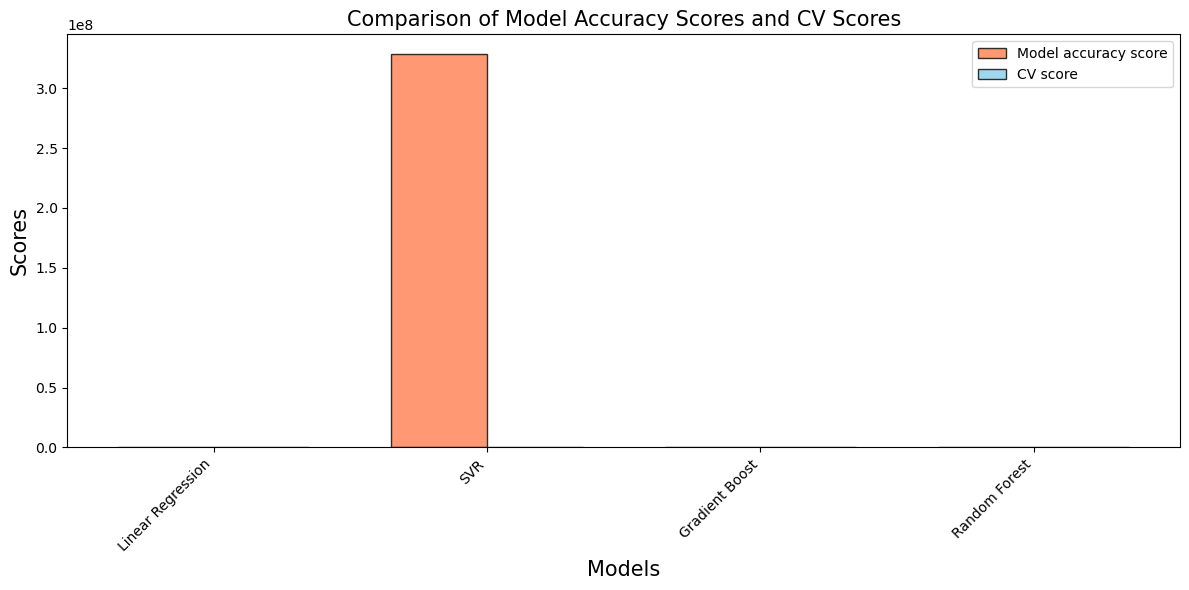

In [29]:
bar_width = 0.35
r1 = np.arange(len(myLabels))
r2 = [x + bar_width for x in r1]
plt.figure(figsize=(12, 6))
plt.bar(r1, Accuracy_score, color='coral', width=bar_width, edgecolor='k', alpha=0.8, label='Model accuracy score')
plt.bar(r2, score, color='skyblue', width=bar_width, edgecolor='k', alpha=0.8, label='CV score')
plt.xlabel('Models', fontsize=15)
plt.ylabel('Scores', fontsize=15)
plt.title('Comparison of Model Accuracy Scores and CV Scores', fontsize=15)
plt.xticks([r + bar_width/2 for r in range(len(myLabels))], myLabels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
feature_coefficients = LR_model.coef_
for i, coefficient in enumerate(feature_coefficients):
    print(f"Feature {i}: {coefficient}")

Feature 0: 8.490192311441452e-05
Feature 1: -0.003377049093371708
Feature 2: 0.00468852159816858
Feature 3: -0.0011136143347987883
Feature 4: 0.00019366457686278288
Feature 5: 0.00010244086203919922
Feature 6: -0.9271487546136963
Feature 7: -2.6814904521994034
Feature 8: -1.9966950068068345
Feature 9: 6.434852650727407e-13
Feature 10: 5.848654893725325e-13
Feature 11: -0.7352956662275719
Feature 12: 2.5932064418723906
Feature 13: -5.506706202140776e-13
Feature 14: -4.719646311744398
Feature 15: 1.8030021919912542e-13
Feature 16: 0.3033112286030264
Feature 17: 3.927406705041098
Feature 18: 4.507854078513871
Feature 19: -1.7017492360626312
Feature 20: -2.9345199290535495
Feature 21: 0.14521113371092267
Feature 22: -8.337774914934926e-14
Feature 23: -5.115907697472721e-13
Feature 24: 0.7575556194909755
Feature 25: 0.49259965877529704
Feature 26: -1.1140753364162241
Feature 27: -2.058214421094223
Feature 28: 0.5582013896806284
Feature 29: -1.886867870054456
Feature 30: 1.5536209175902431
F

In [32]:
X_train_array = X_train.to_numpy()
top_features_indices = feature_coefficients.argsort()[-5:]
selected_features = X_train.iloc[:, top_features_indices]

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer

In [38]:
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_regression, k=5)),
    ('model', LinearRegression())
])

In [39]:
pipeline.fit(X_train, y_train)
val_predictions = pipeline.predict(X_val)

In [40]:
val_mse = mean_squared_error(y_val, val_predictions)
print("Validation MSE:", val_mse)

Validation MSE: 24.748444393214978


In [41]:
test_predictions = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
print("Test MSE:", test_mse)

Test MSE: 5.558925977406378


In [42]:
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores = -cv_scores
print("Cross-Validation MSE Scores:", cv_scores)
print("Mean MSE:", np.mean(cv_scores))
print("Standard Deviation of MSE:", np.std(cv_scores))

Cross-Validation MSE Scores: [35.4824038  15.6921052  16.14853626 30.8166035  15.82464606]
Mean MSE: 22.79285896314942
Standard Deviation of MSE: 8.585205224464122


In [49]:
from sklearn.metrics import r2_score

In [50]:
train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, train_predictions)
val_mse = mean_squared_error(y_val, val_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Calculate R-squared (R2)
train_r2 = r2_score(y_train, train_predictions)
val_r2 = r2_score(y_val, val_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("Train MSE:", train_mse)
print("Validation MSE:", val_mse)
print("Test MSE:", test_mse)

print("Train R2 Score:", train_r2)
print("Validation R2 Score:", val_r2)
print("Test R2 Score:", test_r2)

Train MSE: 4.7716072810726144
Validation MSE: 28.577963402493186
Test MSE: 28.577963402493186
Train R2 Score: 0.8103725848975691
Validation R2 Score: 0.384719626692795
Test R2 Score: 0.384719626692795
